### Importación de librerias básicas.

In [1]:

import numpy as np  # Nos perimite hacer calculos matemáticos
import pandas as pd # Manipulación de datos y cargar archivos
import matplotlib.pyplot as plt # Gráficos
import seaborn as sns # Gráficos más bonitos
import warnings # Ignorar mensajes de advertencia

In [2]:
warnings.filterwarnings('ignore') # Ignorar mensajes de advertencia

<h1><center>Seguro médico</center></h1>

<img src="spanish-seguro-medico-health-insurance-EDITED.jpg" width="500" height="500" align="center"/>



## ¿Qué variables Qué varibles afectan en el precio del seguro médico?

### Definición del probelma

Predecir el costo médico según el área residencial del beneficiario.

- **Age** edad del beneficiario principal.

- **Sex** sexo de la persona.

- **Bmi** indice de masa corporal de la persona.

- **Children** Número de hijos cubiertos por el seguro médico.

- **Smoker** Si la persona fuma o no.

- **Region** El área residencial del beneficiario en Estados Unidos.

- **Charges** Costos médicos individuales facturados por el cargo médico.

#### Cargamos la base de datos.

In [3]:
insurence_df=pd.read_csv("C:\\Users\\amado\\Desktop\\Ciencias de datos\\Bases de datos\\insurance.csv")
# Invocamos la función read_csv para importar nuestra base de datos que está en formato csv.

# Análisis Exploratorio

Es el proceso en el que analizamos los datos,comprendemos la naturaleza de ellos e identificamos las variables más significativas que influyen en el resultado.

### Cantidad de columnas y observaciones del dataframe.

In [6]:
insurence_df.shape 

(1338, 7)

Cuenta con 7 columnas y 1338 observaciones.

#### Visualizamos las primeras 5 observaciones.

In [7]:
insurence_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Información del dataset. 

In [8]:
insurence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Las variables como el sexo,la región y si la persona fuma,son de tipo objecto es decir tipo de texto.

El resto de las variables son tipo numéricas.

#### Visaulización de las categorias.

In [9]:
{col:list(insurence_df[col].unique()) for col in insurence_df.select_dtypes('object')}
# Seleccionamos las variables tipo objecto y que nos muestre sus categorias.

{'sex': ['female', 'male'],
 'smoker': ['yes', 'no'],
 'region': ['southwest', 'southeast', 'northwest', 'northeast']}

El sexo es una variable binaria donde solo hiciste dos clases en este caso si es hombre o mujer.

La variable que hace alusión si el usario que fuma, también es binaria es este caso si fuma o no.

La variable región es una variable multinomial  es decir donde hiciste 3 o más categorias que hacen alusión en la zona geográfica del asegurado.

#### Creación de gráficas de pastel.

In [10]:
region_serie=insurence_df.groupby('region').size()
smoker_serie=insurence_df.groupby('smoker').size()
sex_serie=insurence_df.groupby('sex').size()



def pie_plot(serie,title):
    
    
    serie.plot(kind='pie',title=title, figsize=[20,8],colors=['#77dd77','#fdfd96','#84b6f4','#fdcae1'],
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*serie.sum()))

    plt.ylabel(None)
    
#Hacemos una función para crear dichas gráficas para automatizar código,cada una de ellas monstrara el porcentaje 
# de la variable de interés a su como su cantidad numérica.

### Porcentaje de usuarios por región.

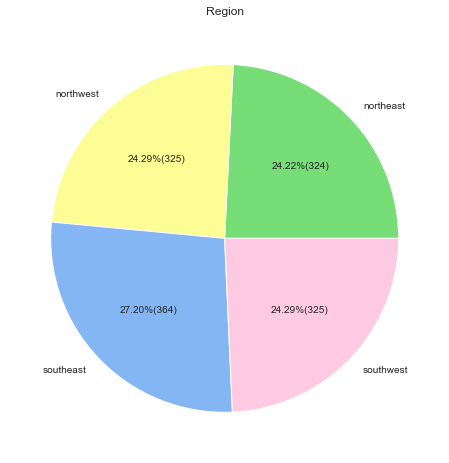

In [11]:
pie_plot(region_serie,'Region')

### Porcentaje del sexo de las personas

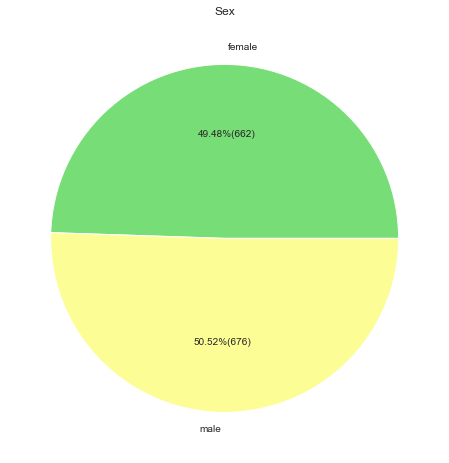

In [12]:
pie_plot(sex_serie,'Sex')

### Porcentaje de fumadores

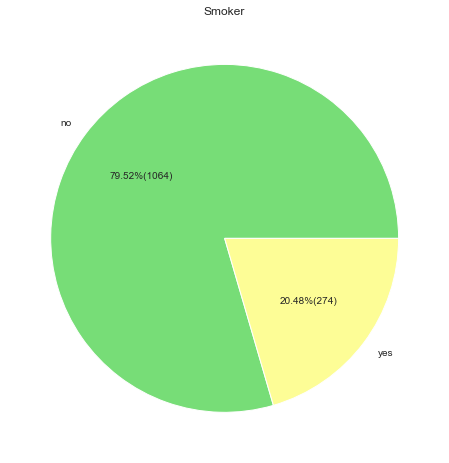

In [13]:
pie_plot(smoker_serie,'Smoker')

### Histograma y gráfica de caja.

Nos permite ver la distribución de las variable de interés,para identificar valores atípicos es decir valores que se salen de lo normal como la típica obeja negra de la familia.

### Histograma y gráfica de caja del precio del seguro médico.

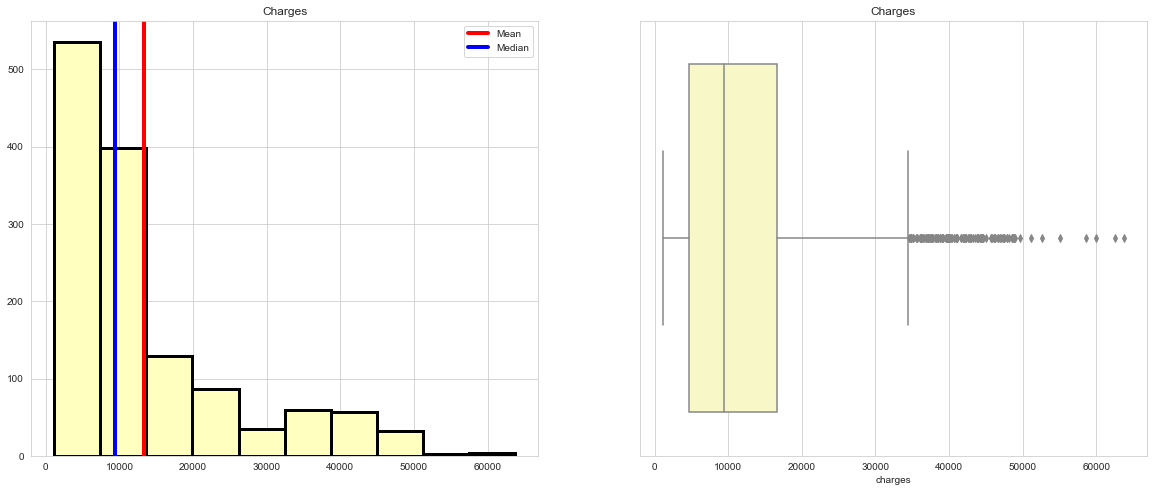

In [14]:

sns.set_style(style='whitegrid')
fig,(ax_hist,ax_box)=plt.subplots(1,2,figsize=(20,8))

ax_hist.set_title('Charges')

ax_hist.hist(insurence_df['charges'],ec='k',color='#ffffbf',lw=3)

ax_hist.axvline(insurence_df['charges'].mean(),linestyle='-',lw=4,c='red',label='Mean')
ax_hist.axvline(insurence_df['charges'].median(),linestyle='-',lw=4,c='blue',label='Median')
ax_hist.legend()


ax_box.set_title('Charges')
sns.boxplot(x='charges',data=insurence_df,color='#ffffbf',ax=ax_box)

plt.show()

La linea roja representa el valor promedio,la azul representa la mediana es decir el valor del medio ordenado de menor a mayor.

En la gráfica de caja(la de la derecha) tiene muchos puntos lo cual son los valores que se salen de lo normal,tal vez tenga una explicación que faltan más variables a tener en cuenta para porder explicar dichos valores.

### ¿Sí la persona fuma influye en cargo del seguro médico?

Creación de la gráfica de caja teniendo en cuenta a la variable que hace referencia si fuma o no la persona, con el objetivo de ver si es una variable significativa y si puede explicar los valores atípicos.

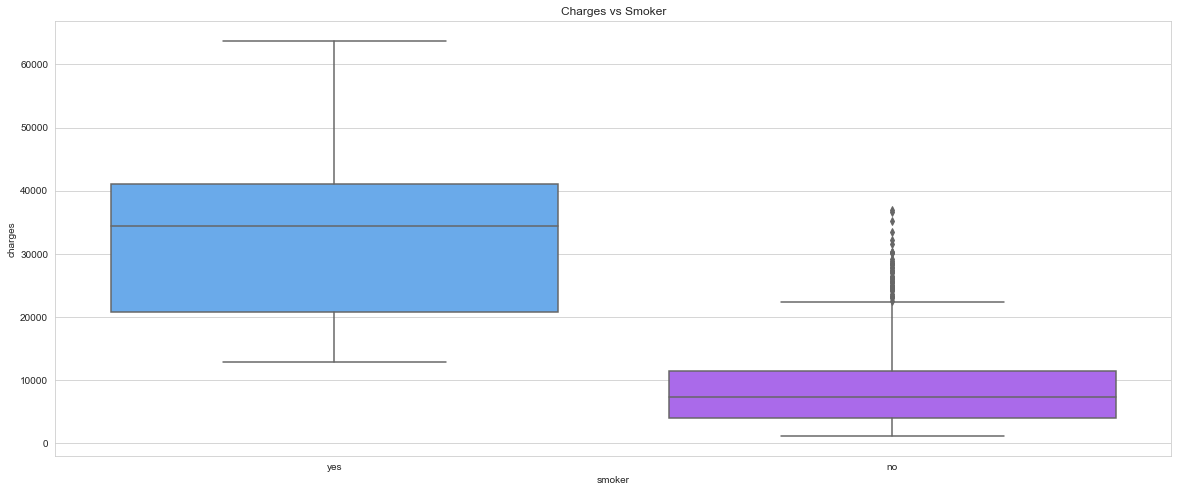

In [15]:
plt.subplots(1,1,figsize=(20,8))

plt.title('Charges vs Smoker')
sns.boxplot(x='smoker',y='charges',data=insurence_df,palette='cool')
plt.show()

Las personas fumadoras tienen a tener un costo más alto que las que no, lo cual es variable que si difiere en el precio del cargo del seguro médico.

### ¿Qué región de Estados Unidos tiene el precio de seguro más alto?

Creación de una gráfica de barras.

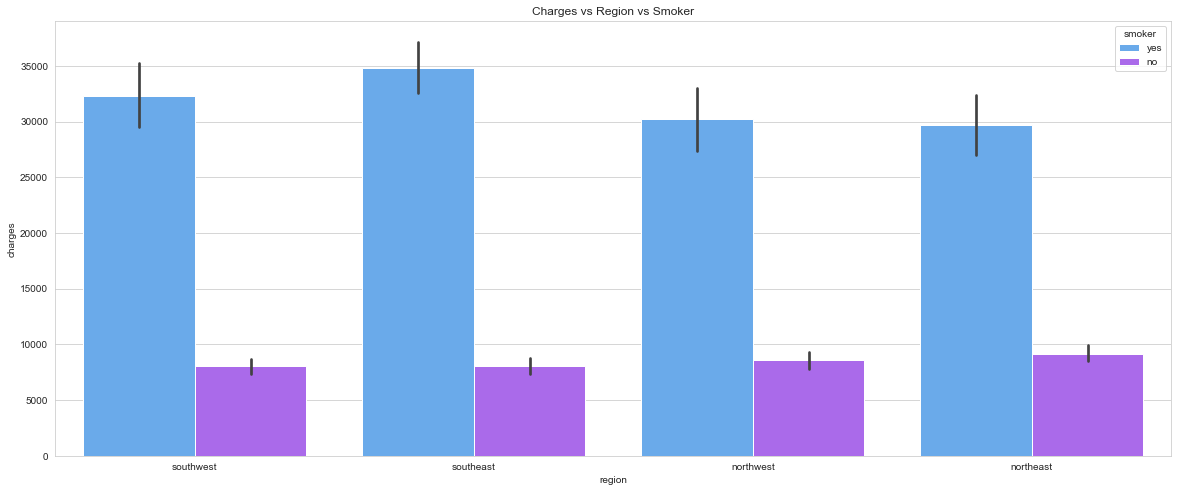

In [16]:

plt.subplots(1,1,figsize=(20,8))

plt.title('Charges vs Region vs Smoker')
sns.barplot(x='region',y='charges',hue='smoker',data=insurence_df,palette='cool')
plt.show()

In [17]:
insurence_df.groupby(['smoker','region']).max()['charges']

# Le pedimos que nos haga agrupaciones de datos de acuerdo a la región y si la persona fuma , en basa a dichas variables
# va a calcular el valor máximo del seguro médico.

smoker  region   
no      northeast    32108.66282
        northwest    33471.97189
        southeast    36580.28216
        southwest    36910.60803
yes     northeast    58571.07448
        northwest    60021.39897
        southeast    63770.42801
        southwest    52590.82939
Name: charges, dtype: float64

Las personas con el área residencial ubicada en el sur oeste tiene un precio de seguro más alto para las personas que fuman, mientras las que no tienen un precio bastante similar entre ellas mismas.

### ¿El indice de masa corporal influye en el precio del seguro médico?

Creamos una gráfica de dispersión donde le asigamos como variable independiente el indice de masa corporal(x) y variable dependeinte(y) el precio del seguro en base si el usuario es fumador o no.

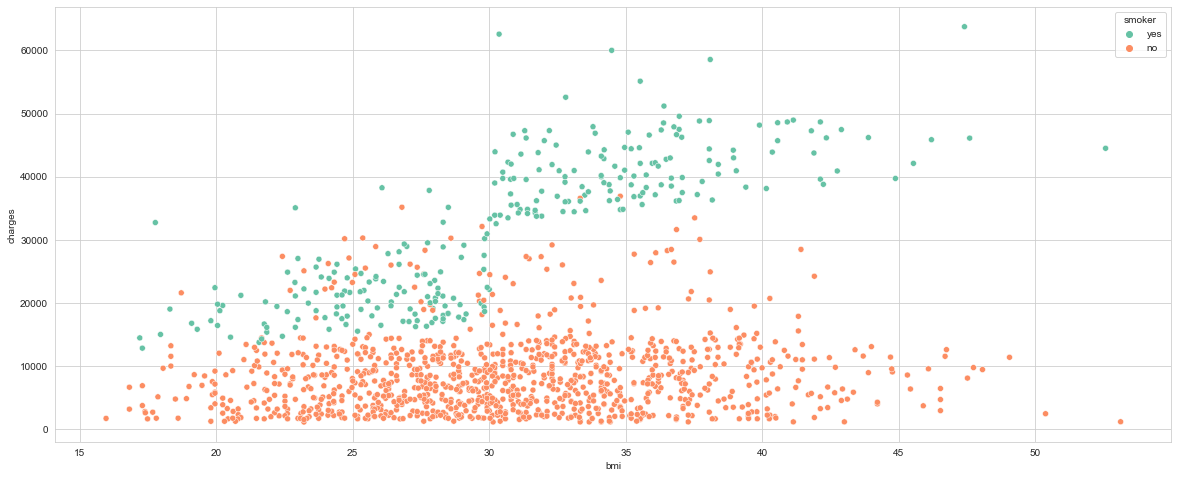

In [18]:
plt.subplots(1,1,figsize=(20,8))
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=insurence_df,palette='Set2')

plt.show()

El IMC se comporta tiene una tendencia constante para aquellos que no fuman, mientras para los que si se comporta de una naturaleza lineal.

### ¿El número de hijos cubiertos por el seguro influye en su precio?

Creamos una gráfica de puntos donde para el eje x le asignamos el número de hijos,para el eje y el precio del seguro.

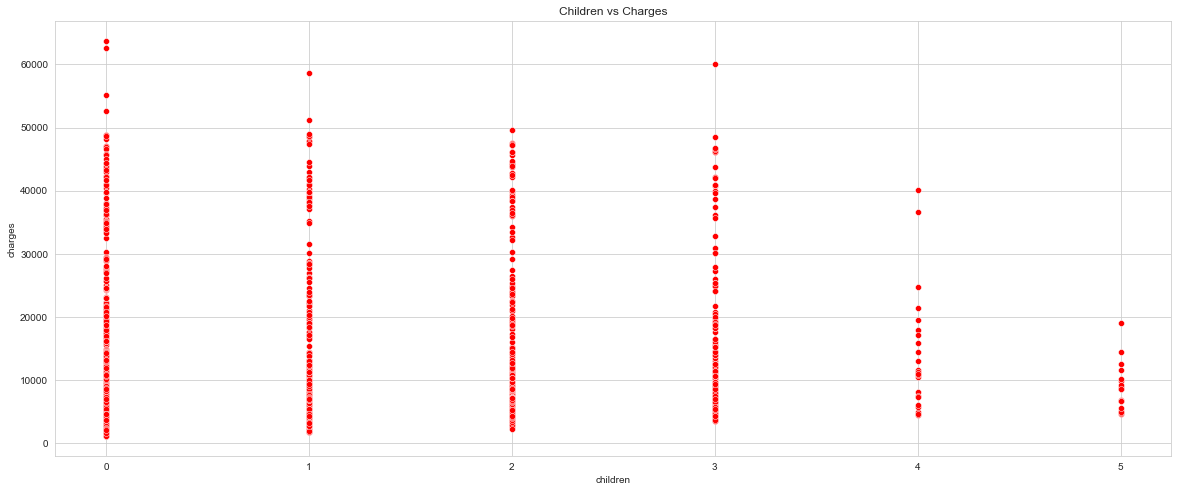

In [19]:
plt.subplots(1,1,figsize=(20,8))
plt.title('Children vs Charges')
sns.scatterplot(x='children',y='charges',data=insurence_df,color='r')
plt.show()

In [20]:
insurence_df.groupby('children')['charges'].max()
# Calculamos el valor máximo del seguro de accuerdo al número de hijos.

children
0    63770.42801
1    58571.07448
2    49577.66240
3    60021.39897
4    40182.24600
5    19023.26000
Name: charges, dtype: float64

Se puede observar una tendencia mayoritaria que entre más tengamos hijos cubiertos por el seguro menor será el precio del cargo del seguro.

### ¿Qué cantidad de niños predomina más?

In [21]:
insurence_df.children.value_counts()
# Hace un conteo para saber que cual es la cantidad de niños asegurados.

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

La mayoria de los usuarios no tienen ningún hijo cubierto por el seguro médico,aunque mayoritariamente las personas tienen de 0 a 3 personas.

# Ingeniería de características.

Es el proceso en el cual transformamos nuestras variables, o eliminamos valores  que se salen de lo normal con el objetivo de que mejore el rendimiento de nuestro algoritmo.

### IMC gráfico de caja y bigotes.

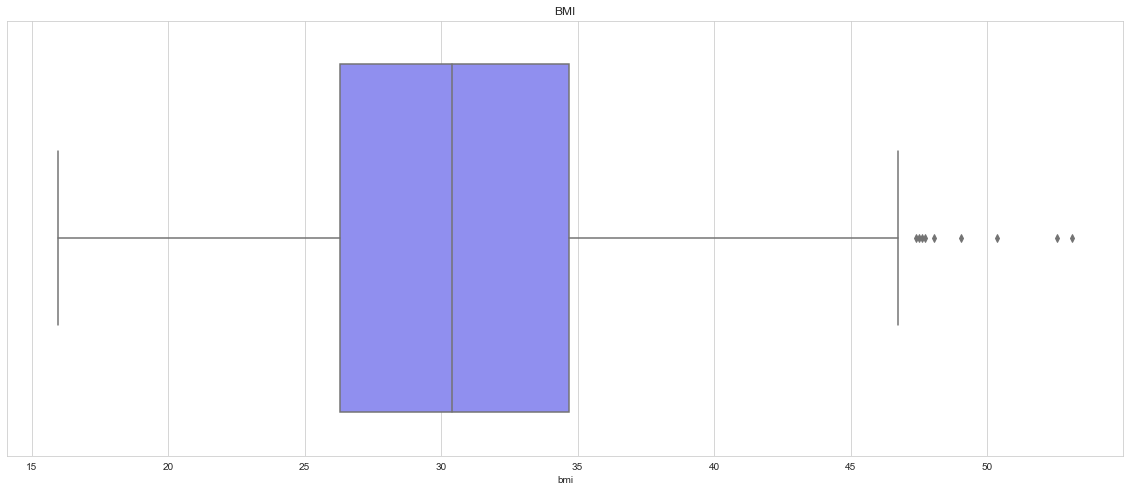

In [22]:
plt.subplots(1,1,figsize=(20,8))

plt.title('BMI')
sns.boxplot(x='bmi',data=insurence_df,palette='cool')
plt.show()

Se aprecia valores anormales para el intervalo superior, por lo cual podemos eliminarlos o remplazar por cualquier valor.

In [23]:
insurence_df.bmi.min()

15.96

Observamos un IMC bastante bajo por lo cual podemos reemplazarlos por un IMC igual a 18 ya que es un valor cercano.

### Reemplazamos los valores atipícos.

In [24]:
insurence_df['bmi']=np.where(insurence_df['bmi']<17,18,insurence_df['bmi'])
# Si el IMC es inferior a 17 lo reemplazara por 18, de lo contrario los dejara igual.

insurence_df['bmi']=np.where(insurence_df['bmi']>47,47,insurence_df['bmi'])

# Si el IMC es estrictamente mayor a 47 los remplazara dicho valor ya que es el más cercano a los valores originales,
# de lo contrario los dejara intactos.

### Eliminación de valores atípicos IMC.

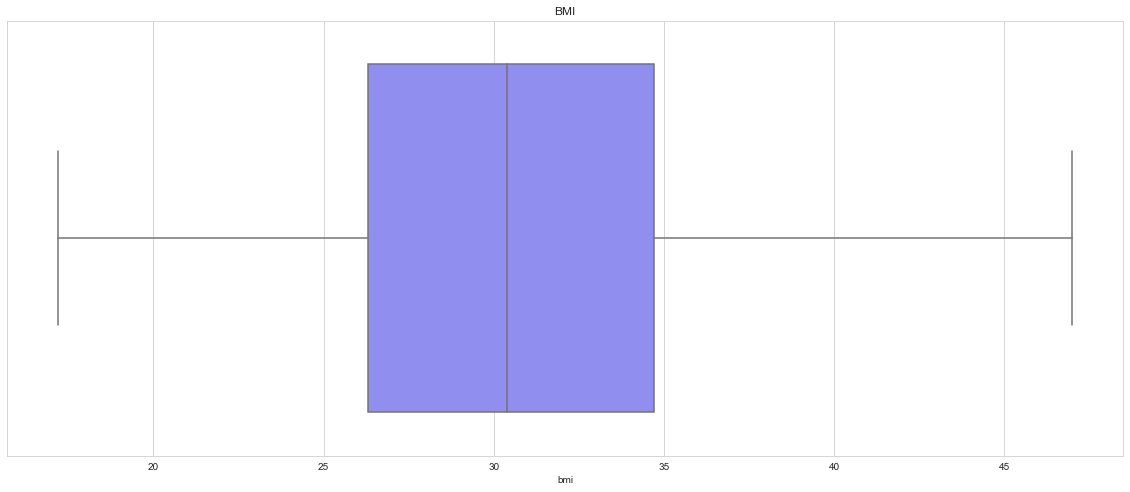

In [7]:
plt.subplots(1,1,figsize=(20,8))

plt.title('BMI')
sns.boxplot(x='bmi',data=insurence_df,palette='cool')
plt.show()

La variable del IMC carece de valores atípicos.

### Dataframe para los usuarios que fuman.

In [25]:
smoker_no=insurence_df[insurence_df['smoker']=='no']

Creamos otro dataframe pero para las personas que fuman con el objetivo de dar un mejor tratatamiento de los datos.

### Edad vs precio de seguro.

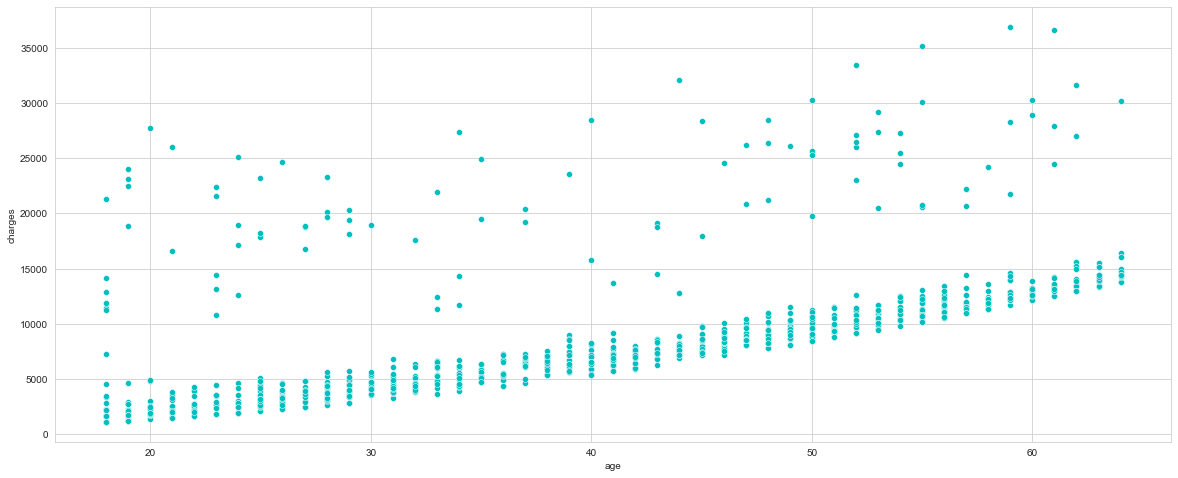

In [26]:
plt.subplots(1,1,figsize=(20,8))
sns.scatterplot(x='age',y='charges',data=smoker_no,color='c')
plt.show()

Se observa que hay valores que se salen de lo normal,el costo médico inferior a $15,000 dólares se mantiene una relación lineal respecto a la edad.

#### Calculamos el intervalo superior.

In [27]:
smoker_no['charges'].mean()+1.5*smoker_no['charges'].std()

# Multiplicamos el promedio del precio del seguro, lo sumamos y a su vez lo multiplicamos por dos desviación estandar
# que es una medida estadistica para ver la variación de la disperción de los datos.

17424.941026648597

In [28]:
smoker_no_outlires=smoker_no[smoker_no['charges']>17424]
# Seleccionara aquelos seguros médicos superiores a $17,421 dólares
smoker_no=smoker_no[smoker_no['charges']<17424]
# Selecciona los seguros donde sea estrictamente menor a dicha cantidad.

Creamos dos subconjuntos uno para los valores atípicos y otro para los datos que son más normales.

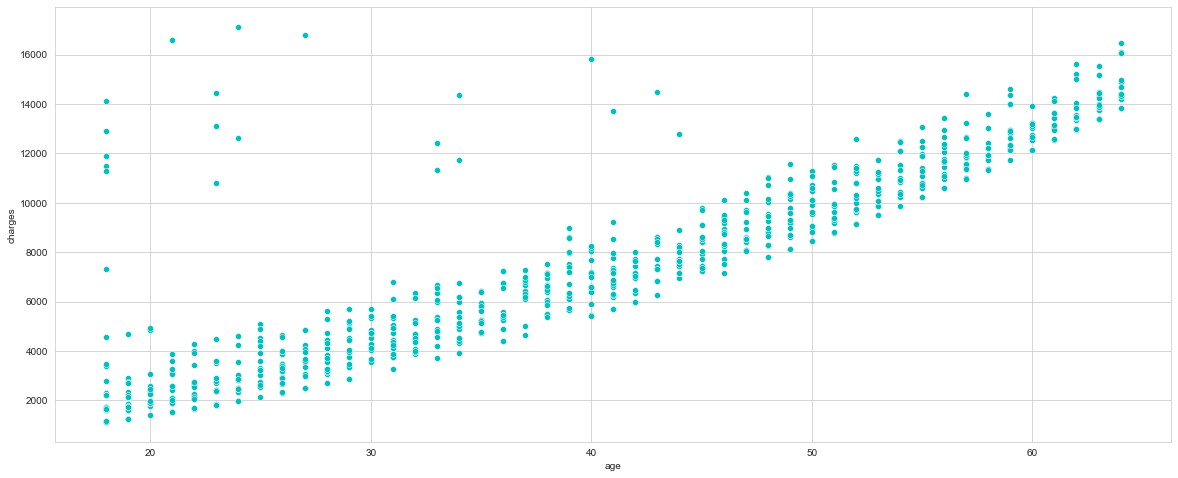

In [29]:
plt.subplots(1,1,figsize=(20,8))
sns.scatterplot(x='age',y='charges',data=smoker_no,color='c')
plt.show()

Todavía hay algún sesgo, por lo que tendré que separar el marco de datos en 3 categorías, la primera es para jóvenes, la segunda es para adultos y la última es para personas mayores de 45 años con el fin de eliminar el sesgo de la valores.

In [30]:
adults_young=smoker_no[(smoker_no['age']>=18) & (smoker_no['age']<30)]
# Seleccionamos los datos donde sea mayor o igual a 18 y que sea menor a 30.

adults=smoker_no[(smoker_no['age']>=30) & (smoker_no['age']<=45)]

# Seleccionamos los datos donde sea mayor o igual a 30 y que sea menor o igual a 45.

adults_old=smoker_no[smoker_no['age']>45]

# Seleccionamos los valores donde la edad sea estrictamente mayor a 45.

### Edad vs precio de seguro

De acuerdo a la categoria de adultos que establecimos anteriormente.

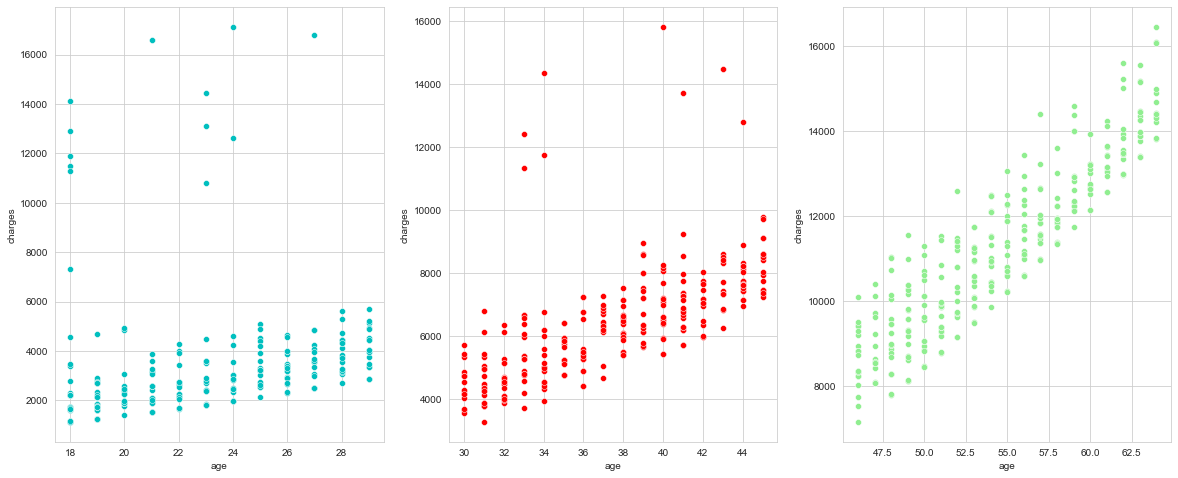

In [31]:
fig,(ax_1,ax_2,ax_3)=plt.subplots(1,3,figsize=(20,8))

sns.scatterplot(x='age',y='charges',data=adults_young,ax=ax_1,color='c')
sns.scatterplot(x='age',y='charges',data=adults,ax=ax_2,color='r')
sns.scatterplot(x='age',y='charges',data=adults_old,ax=ax_3,color='lightgreen')

plt.show()

In [32]:
adults_young_outlires=adults_young[adults_young['charges']>6000]
# Seleccionamos valores atípicos
adults_young=adults_young[adults_young['charges']<6000]

# Seleccionamos valores normales

adults_outlires=adults[adults['charges']>10000]

# Seleccionamos valores atípicos
adults=adults[adults['charges']<10000]

# Seleccionamos valores normales

In [33]:
smoker_no_outlires=pd.concat([adults_young_outlires,
                              adults_outlires,
                              smoker_no_outlires,adults_old])
# Creamos otro dataframe para aquellos valores que son atipícos, los trataremos como si fueran valores nulos. 

smoker_no_clear=pd.concat([adults_young,adults,adults_old])

# Creamos un nuevo dataframe para aquellos dantos donde carezcan de valores anormales.

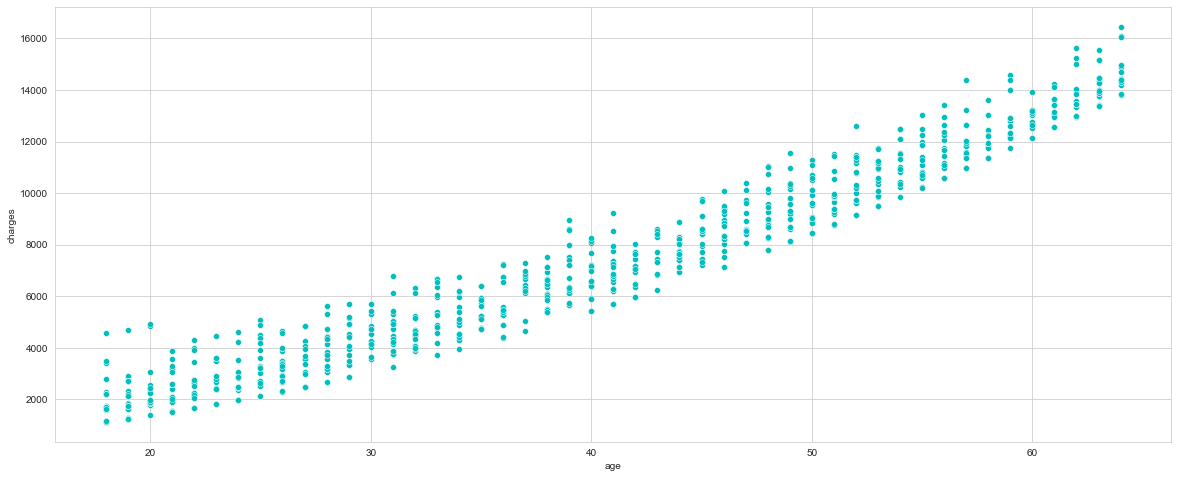

In [34]:
plt.subplots(1,1,figsize=(20,8))
sns.scatterplot(x='age',y='charges',data=smoker_no_clear,color='c')
plt.show()

Observamos que hay una clara relación lineal entre ambas variables,aún tenemos un dataframe donde hay valores atípicos por lo cual podemos hacer una técnica similar a lo que hicimos con el IMC, pero en vez de reemplazar los valores con un único valor, podemos crear un modelo de regresión lineal con el objetivo de reemplazar los valores atípicos asi tendrá valor más cercanos a los originales en vez de cambiarlos por una  medida estadística básica.

<h1><center>Regresión lineal</center></h1>


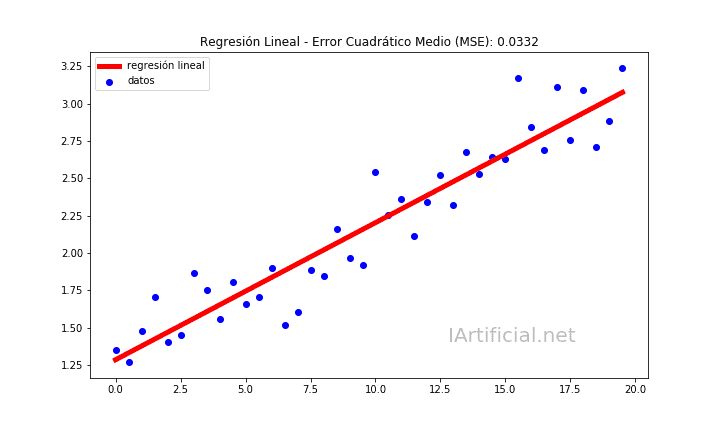

Es un algoritmo estadistíco, que consiste en crear la mejor linea recta en caso de usar una variable predictora que mejor se adapte al conjunto de datos,si usamos más de una variable estariamos hablando de una regresión lineal múltiple donde se crea el mejor hiper plano que se adapte al conjunto de los datos.

#### Creación del modelo de regresión lineal.

In [35]:
from sklearn.linear_model import LinearRegression 
# De la libreria de sklearn que se usa habitualmente en IA  importamos el módulo de regresión lineal.

lm=LinearRegression()

# Creamos un objeto donde guarde el modelo de regresión lineal.

lm.fit(smoker_no_clear[['age']],smoker_no_clear['charges'])

# Le damos los datos de entrada y salida a nuestro modelo.

LinearRegression()

In [36]:
round(lm.score(smoker_no_clear[['age']],smoker_no_clear['charges'])*100,2)
# Calculamos el desempeño de nuestro modelo.

95.42

Dicho modelo puede explicar el 95.42% de los datos para aquellos usuarios que no fuman.

### Reemplazo de los valores atípicos

Usamos el modelo que creamos anteriormente para reemplazar aquellos valores que salen de lo normal.

In [37]:
smoker_no_outlires['charges']=lm.predict(smoker_no_outlires[['age']])
# Usamos la función predict y le pasamos como parámetros los variables predictores.

Reemplazamos los valores atípicos por nuevos valores predichos por la regresión lineal.

In [38]:
smoker_no_clear=pd.concat([smoker_no_clear,smoker_no_outlires])
# Creamos otro dataframe pero está vez sin ningún valor atipíco para el otro conjunto.

### Edad vs precio de seguro

Con los datos atípicos valores reemplazados.

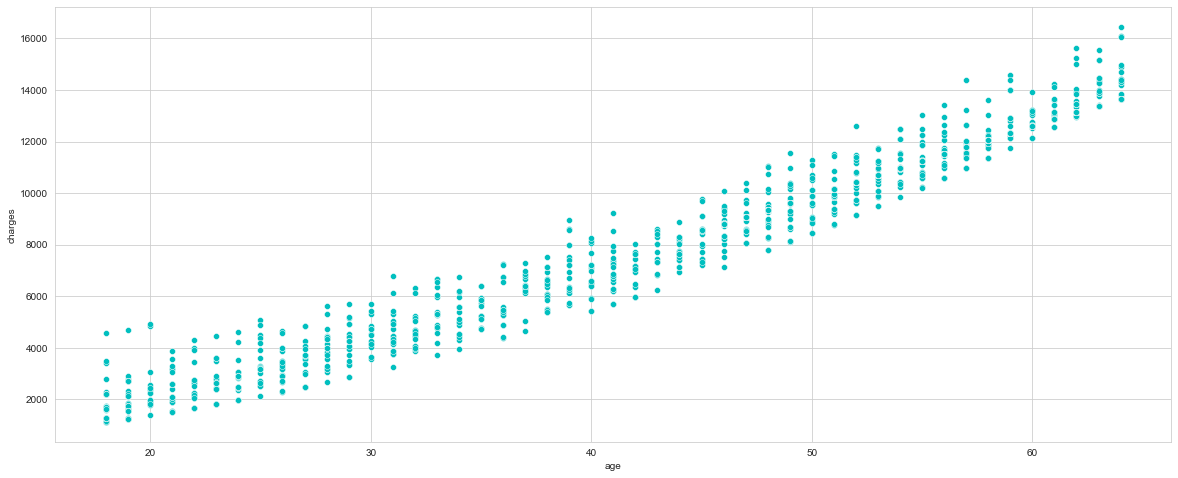

In [39]:
plt.subplots(1,1,figsize=(20,8))
sns.scatterplot(x='age',y='charges',data=smoker_no_clear,color='c')
plt.show()

Hay una mejor limpieza de datos.

### Dataframe para los usuarios que fuman.

In [40]:
smoker_yes=insurence_df[insurence_df['smoker']=='yes']

Creamos otro subconjuto de datos para las personas que si fuman.

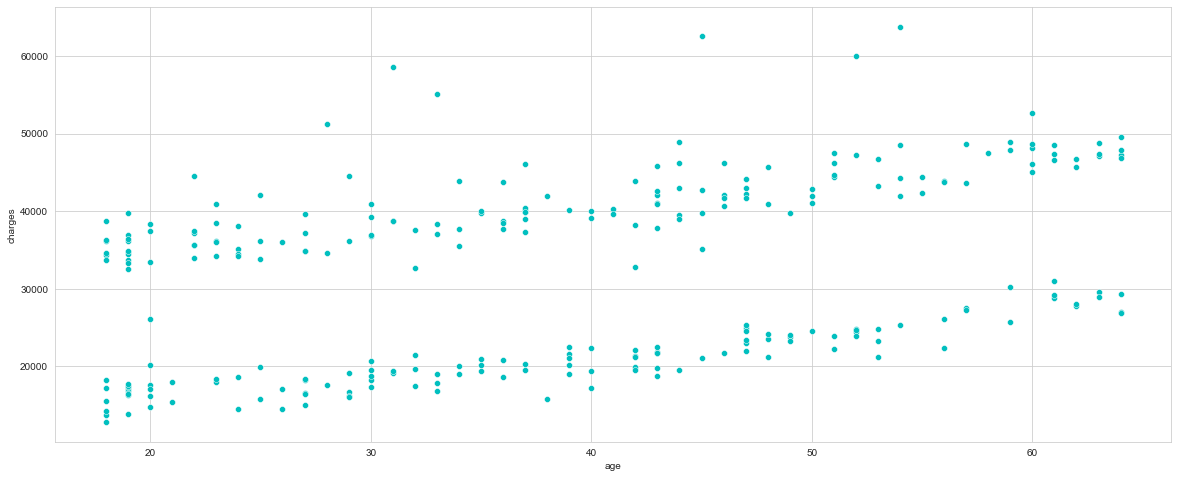

In [41]:
plt.subplots(1,1,figsize=(20,8))
sns.scatterplot(x='age',y='charges',data=smoker_yes,color='c')
plt.show()

Como se vio en la gráfica de caja las personas que fuman tienen cargos de seguros médicos más elevados que los que no.

#### Reemplazo de valores atípicos.

In [44]:
smoker_yes=smoker_yes[smoker_yes['charges']<50000]

# Seleccionamos aquelos valores que sean estrictamente menor a $50,000 dólares.


In [26]:
smoker_yes.children.value_counts()

0    111
1     59
2     55
3     38
4      3
5      1
Name: children, dtype: int64

Observamos que hay muy pocos casos donde los asegurados que fuman tienen más de 3 hijos, po lo cual los podemos eliminar.

In [46]:
smoker_yes=smoker_yes[smoker_yes['children']<4]

In [50]:
smoker_yes_clear=smoker_yes
# Creeamos otro dataframe pero donde carezca valores atípicos.

### Dataframe limpio.

Carece de valores atípicos.

In [64]:
insurence_clear=pd.concat([smoker_yes_clear,smoker_no_clear])
# Concatenamos los dataframe para los usuarios que fuman y los que no pero con los datos limpios es decir sin valores
# atípicos.

<h3><center>Dataframe sucio vs limpio</center></h3>

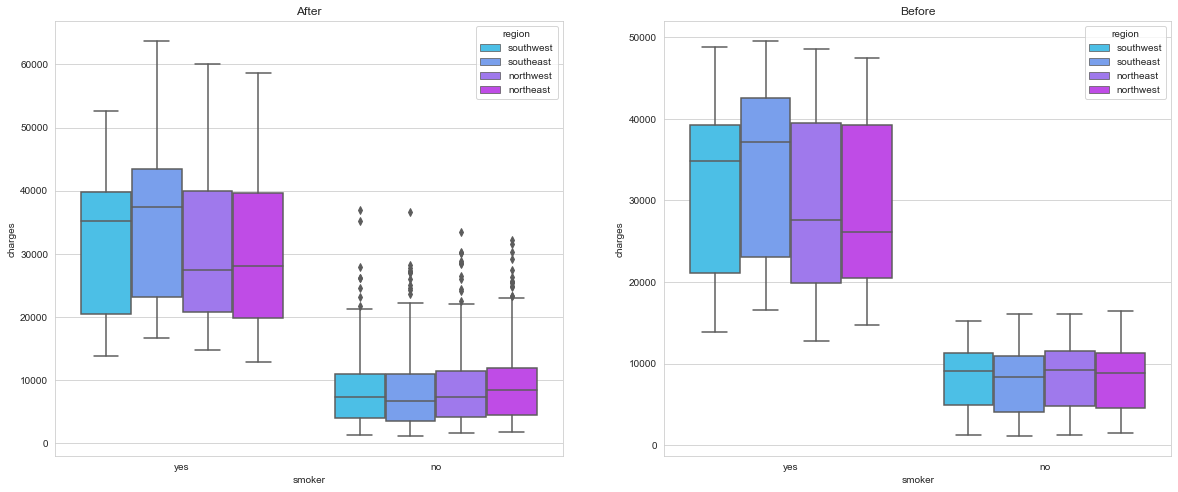

In [65]:
fig,(ax_1,ax_2)=plt.subplots(1,2,figsize=(20,8))

ax_1.set_title('After')
sns.boxplot(x='smoker',y='charges',hue='region',data=insurence_df,palette='cool',ax=ax_1)

ax_2.set_title('Before')
sns.boxplot(x='smoker',y='charges',hue='region',data=insurence_clear,palette='cool',ax=ax_2)
plt.show()

### Preprocesamientos de datos.

In [66]:
insurence_clear['smoker']=np.where(insurence_clear['smoker']=='yes',1,0)
# Tranformamos la variable smoker a numérica,para las personas que fuman les asignara un 1 caso contrario un 0.

In [67]:
insurence_clear['sex']=np.where(insurence_clear['sex']=='male',1,0)
# Tranformamos la variable male a numérica,para las personas  con sexo masculino les asiganmos un 1 caso contrario un 0.

### Variables ficticias.
 
Este tipo de transformación para el tipo de variables cualitativas como por ejemplo el área de localización del beneficiario.

In [68]:
insurence_clear=pd.get_dummies(insurence_clear,drop_first=True)
# Creamos las variables ficticias,con el paráemtro drop_first le indicamos que borramos la primera columna
# de la variable ficticia,si no pertence a ninguna de estás regiones se le pone un 0 a las 3 las columnas de las variables
# dummy así se simplifica.

In [69]:
insurence_clear.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,16884.9240,0,0,1
11,62,0,26.29,0,1,27808.7251,0,1,0
14,27,1,42.13,0,1,39611.7577,0,1,0
19,30,1,35.30,0,1,36837.4670,0,0,1
23,34,0,31.92,1,1,37701.8768,0,0,0


Observamos los datos ya transformados.

### División de datos de entrenamiento y validación.

Con el objetivo de averiguar el rendimiento de nuestro modelo para datos que nunca haya visto antes.

In [71]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

# De la libreria sklearn treamos el modelo de train_test_split que sirve para separar los datos de entrenamiento y validación,
# también traemos el método cross_val_score que consiste sacar un idea más realista del rendimiento del modelo y finalmente
# GridSearchCv para encontrar la mejor combinación de parámetros.




X=insurence_clear.drop(['charges'],axis='columns').values # Borramos la variable a predecir, sólo dejamos las variables predictoras.
y=insurence_clear.charges.values # Dejamos sólo la variable a predecir, ya que el tipo de algortimo es de aprendizaje supervisado
# donde al modelo le damos le damos las respuestas con el objetivo que encuentre patrones en los datos.

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=11)

# A la función train_test_split le pasamos como parametros las variables predictoras y el las etiquetas,
# test_size nos indica el porcentaje que queremos para hacer validación,y finalmente random_state nos indica el estado
# aleaotorio de los datos,para que sin importar las veces que ejecute este código voy a tener los mismos datos de entrenamiento
# y validación.

# Dimensiones de datos de entrenamiento y validación

X_train.shape,X_test.shape

((1186, 8), (509, 8))

Tenemos 1191 datos de entrenamiento y 511 para hacer validación.

<h3><center>Gradient Boosting</center></h3>

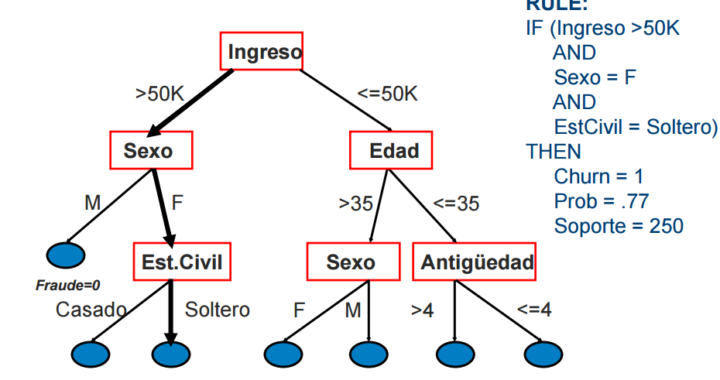


Es un algoritmo que forma parte los tipos de ensamble,dichos algoritmos se pueden representar con la siguiente frase
"**la unión hace la fuerza**",ya que el gradient boosting usa otros algoritmos más débiles generalmente árboles de decisión 
como se aprecia en la imágen que se basan en desigualdades matemáticas como los operadores relacionales como mayor,mayor o igual,menor y menor o igual,por dicho motivo no es necesario rescalar o estandarizar los datos,tiene la ventaja de usar los datos originales sin ningún tipo de transformación,claro siempre y cuando las variables sean numéricas.


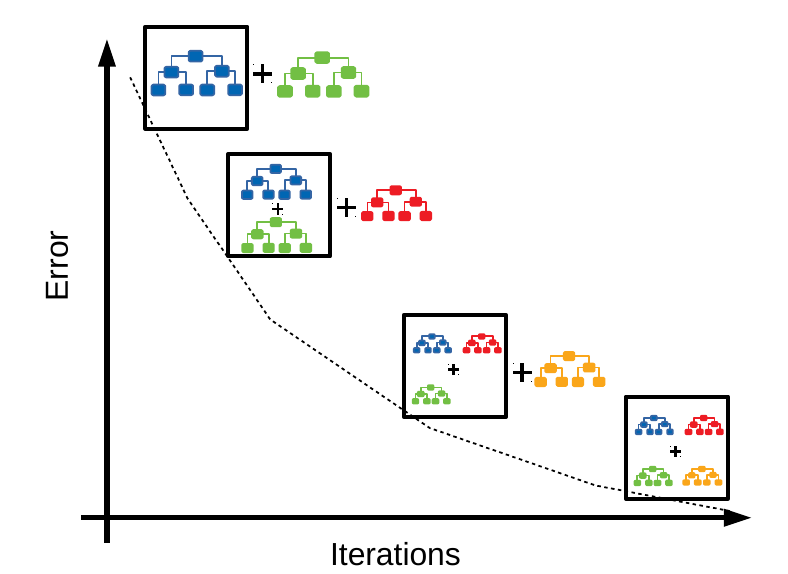

Su principal diferencia de otros algoritmos de ensamble,es que este tiene un parámetro adicional como la tasa de aprendizaje que es el parámetro de mejora del árbol , cada nuevo árbol va hacer mejor que el anterior de tal forma que va disminuyendo la tasa de error y como consecuencia da mejores resultados aunque sea un poco más costoso computacionalmente que su otro hermano random forest.

### Métricas de desempeño

**Error cuadrático medio** es la diferencia entre el valor original y predicho.


**El R ajustado**  mide el grado de covarianza entre el valor original y los valores predichos se mide de 0 a 1,entre más cercano sea a 1 más va hacer el poder explicativo del modelo.

Ambas métricas de desempeño tiene valores muy cercanos,lo cual es una buena señal que nuestro modelo no este sobre entrenado.

<h3><center>Validación cruzada</center></h3>

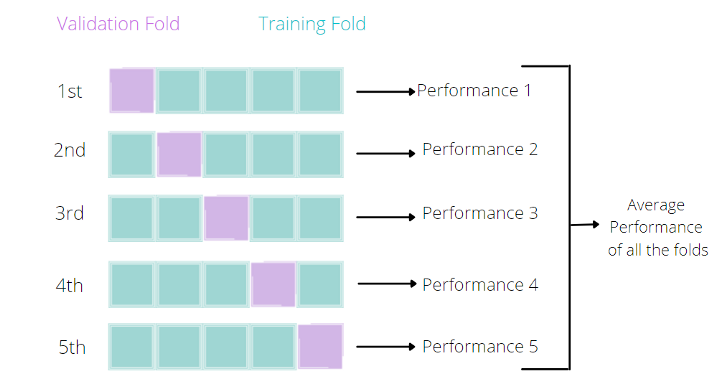

Consiste en crear pequeños pliegues del conjunto de datos para ver el porcentaje de generalización del modelo y así tener una visión más realista del desempeño.

In [170]:
params={'max_depth':[2,3],
        'n_estimators':[100,200,300,400,500,600,700,800,850,900,925,950,975,1000],
       'learning_rate':[0.01],
       'subsample':[0.8,0.85,0.9]}
# Creamos un diccionario donde le asiganamos valores a los parámetros,para que GridSearchCV busque la mejor combinación

# max_depth es la profundad máxmima de cada árbol
# learning_rate tasa de aprendizaje
# n_estimators número de árboles
# tamaño de la muestra de los datos

from sklearn.ensemble import GradientBoostingRegressor

# De la libreria sklearn importamos el algoritmo

grid=GridSearchCV(GradientBoostingRegressor(),param_grid=params,cv=10,n_jobs=-2)
# Pasamos nuestro modelo virgen sin ningún parametro,param_grid lista de parámetros,
#cv número de pliegues,n_jobs número de núcleos trabajando.

In [171]:
grid.fit(X_train,Y_train)
# Le asignamos los datos de entrenamiento.

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-2,
             param_grid={'learning_rate': [0.01], 'max_depth': [2, 3],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 850, 900, 925, 950, 975, 1000],
                         'subsample': [0.8, 0.85, 0.9]})

### Mejor combinación de parámetros.

In [172]:
grid.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=2, n_estimators=1000,
                          subsample=0.85)

In [190]:
gbr=grid.best_estimator_.fit(X_train,Y_train)
# Seleccionamos la mejor combinación de modelos.


gbr.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=2, n_estimators=1000,
                          subsample=0.85)

In [199]:
gbr.score(X_train,Y_train),gbr.score(X_test,Y_test)
# La función score por default nos da el R ajsutado por lo cual no es necesario que importe adicionalmente dicha métrica.

(0.9895685361963494, 0.9849992607059909)

In [198]:
from sklearn.metrics import mean_squared_error
# De la libreria sklearn importamos el error cuadrático medio.

pred=gbr.predict(X_test)
np.sqrt(mean_squared_error(Y_test,pred)),np.sqrt(mean_squared_error(Y_train,gbr.predict(X_train)))

(1258.7158417762314, 1027.349652005732)

En ambas métricas los resultados son similares.

In [200]:
cross_val_score(gbr,X_train,Y_train,cv=10).mean()

0.9833117991592555

In [201]:
cross_val_score(gbr,X_test,Y_test,cv=10).mean()

0.9781755531815793

Los datos de entrenamiento y validación tienen altos porcentaje de generalización altos, por lo cual indica que puede generalizar muy bien, para los datos de validación tiene un promedio de generalización de un 97%.

In [202]:
test=pd.DataFrame({'True values':Y_test,'Predicted values':pred_test})
# Creamos un dataframe para comparar los datos de entrenamiento y validación.

In [209]:
test[:50]
# Visualizamos las primeras 50 observaciones.

,True values,Predicted values
0,39611.757700,38729.146342
1,41661.602000,41882.950195
2,3392.365200,3395.355611
3,8342.908750,8648.901627
4,9880.068000,9969.071128
5,4779.602300,5216.301656
6,5972.378000,6460.343768
7,16776.304050,19499.881069
8,9644.252500,9779.993008
9,15518.180250,16340.837459


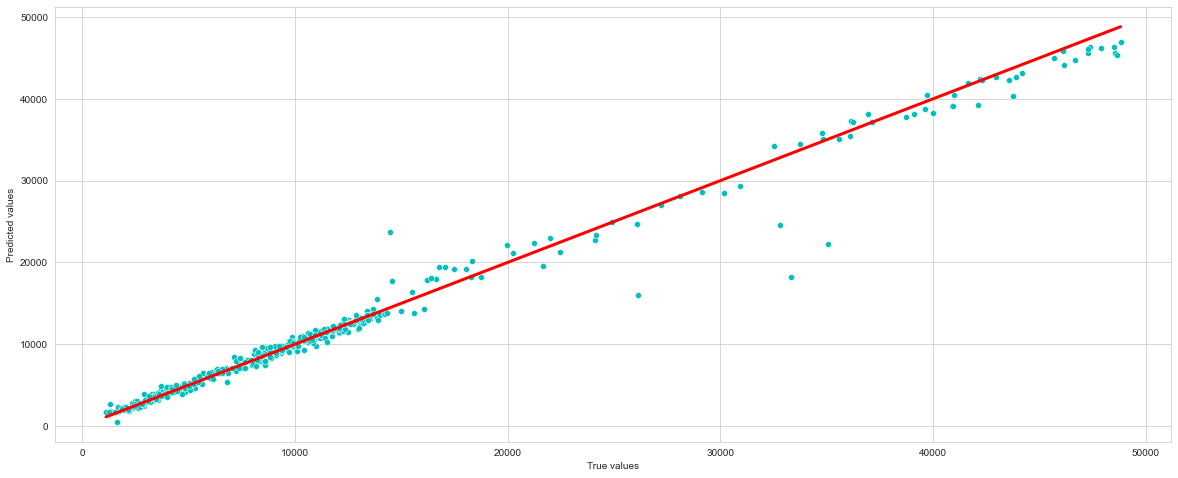

In [211]:

plt.subplots(1,1,figsize=(20,8))
sns.scatterplot(x='True values',y='Predicted values',data=test,color='c')
sns.lineplot(x='True values',y='True values',data=test,color='r',lw=3)
plt.show()

Como observamos la mayoría de los datos tiene predicciones muy cercanas a los datos originales, lo cual generaliza mejor.

# Guardamos el modelo

Hay algunos modelos que pueden tardar una cantidad considerable de tiempo para entrenar por lo cual lo más conveniente es guardarlo.

In [212]:
import joblib

joblib.dump(gbr,'insurence_model.pkl')

['insurence_model.pkl']